# **วิเคราะห์แนวโน้มการติด Covid - 19 จากอาการ**

### 📂เกี่ยวกับชุดข้อมูล
เป็นชุดข้อมูลที่เกี่ยวข้องกับการวิเคราะห์อาการ COVID-19

🧾 ข้อมูลประกอบไปด้วย :

• Fever : ไข้  
• Tiredness : เหน็ดเหนื่อยเมื่อยล้า  
• Dry-Cough : ไอแห้ง  
• Difficulty-in-Breathing : หายใจลำบาก  
• Sore-Throat : เจ็บคอ  
• None_Sympton : ไม่มีอาการ  
• Pains : ความเจ็บปวด  
• Nasal-Congestion : คัดจมูก  
• Runny-Nose : อาการน้ำมูกไหล  
• Diarrhea : ท้องเสีย  
• None_Experiencing : ไม่มีประสบการณ์  
• Severity_Mild : รุนแรงเล็กน้อย  
• Severity_Moderate : ความรุนแรงปานกลาง  
• Severity_None : ความรุนแรงไม่มี  
• Severity_Severe : ความรุนแรงมากที่สุด

### 📚 Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
data = pd.read_csv("Cleaned-Data.csv")

pd.pandas.set_option('display.max_columns',None)

In [6]:
display("Peeking into Data", data)

'Peeking into Data'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Severity_None,Severity_Mild,Severity_Moderate,Severity_Severe,Covid
0,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1
2,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1
3,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1
4,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1
316797,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
316798,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1


In [7]:
display("Description",data.describe())

'Description'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Severity_None,Severity_Mild,Severity_Moderate,Severity_Severe,Covid
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.0
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.250000,0.250000,0.250000,0.250000,1.0
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.433013,0.433013,0.433013,0.433013,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.250000,0.250000,0.250000,0.250000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


<AxesSubplot: >

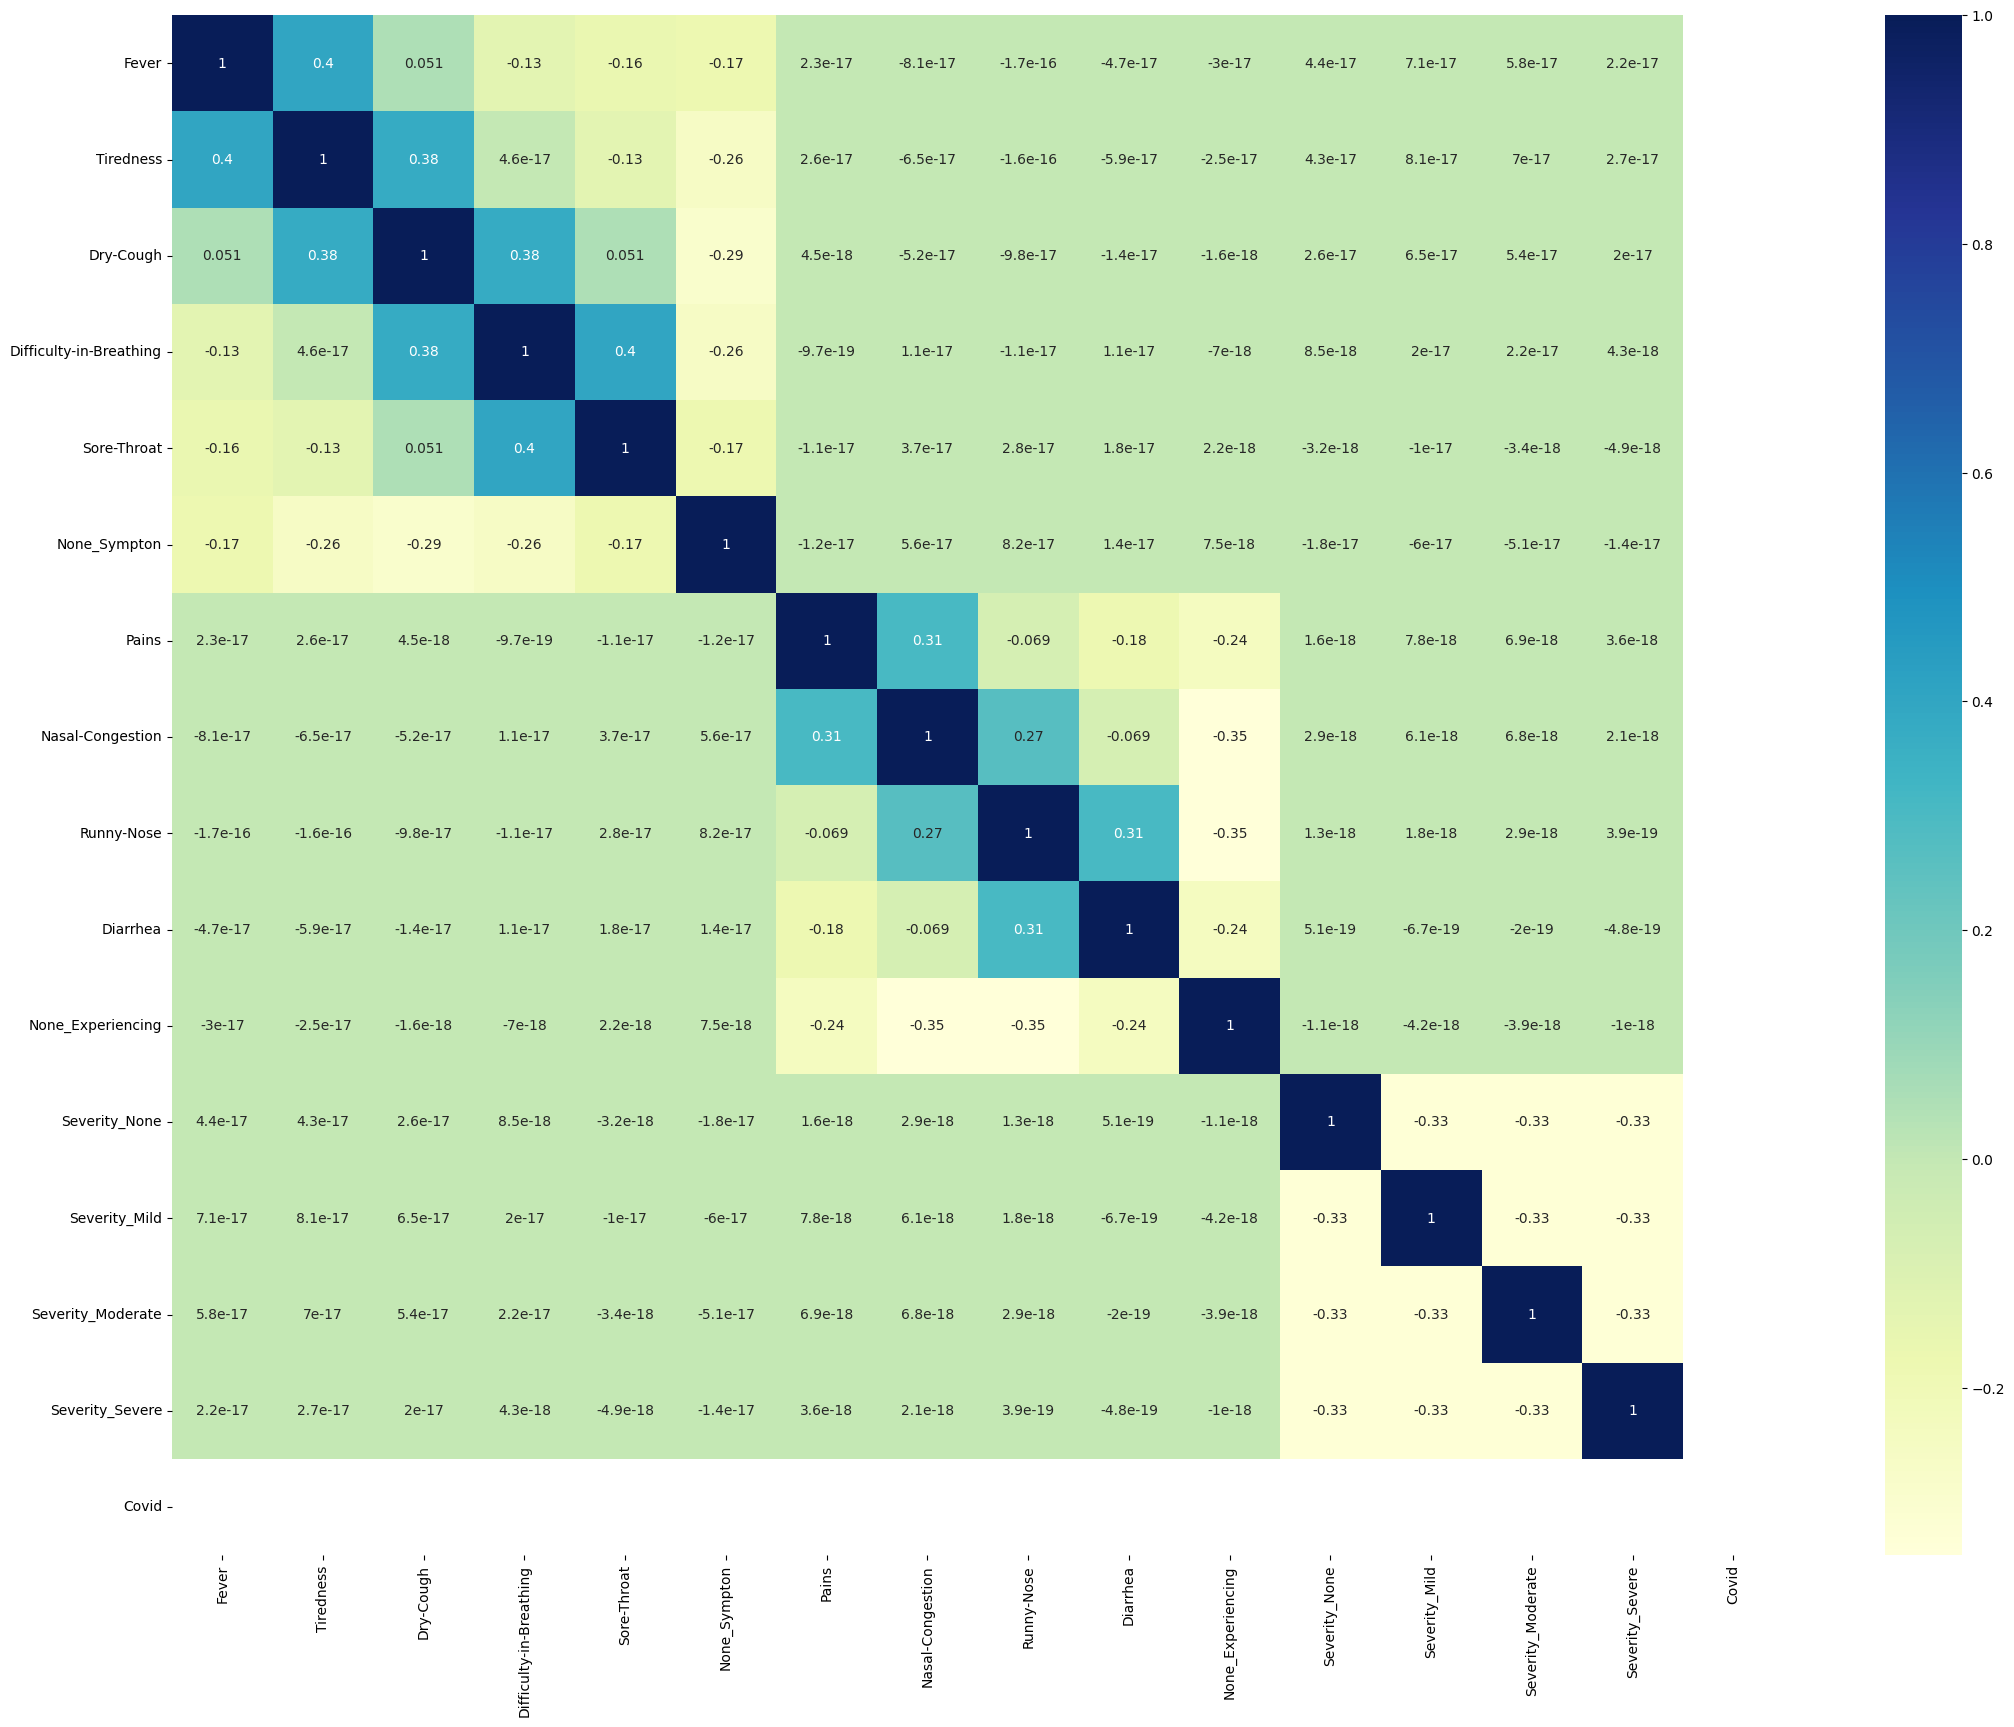

In [21]:
correlations = data.corr()

indx=correlations.index
plt.figure(figsize=(26,20))
sns.heatmap(data[indx].corr(),annot=True,cmap="YlGnBu")